Source: https://www.tensorflow.org/tutorials/

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.10.1


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
print (train_images.shape)
print (len(train_labels))
print (train_labels)

print (test_images.shape)
print (len(test_labels))
print (test_labels)

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000
[9 2 1 ... 8 1 5]


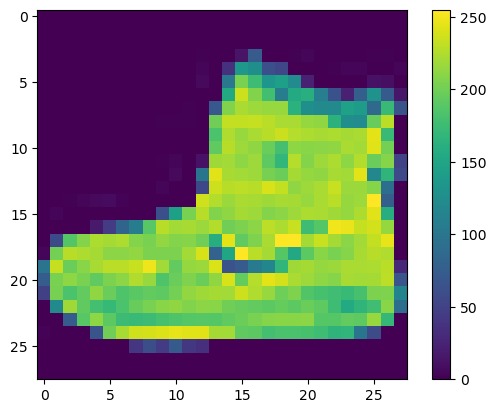

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
train_images = train_images / 255.0

test_images = test_images / 255.0

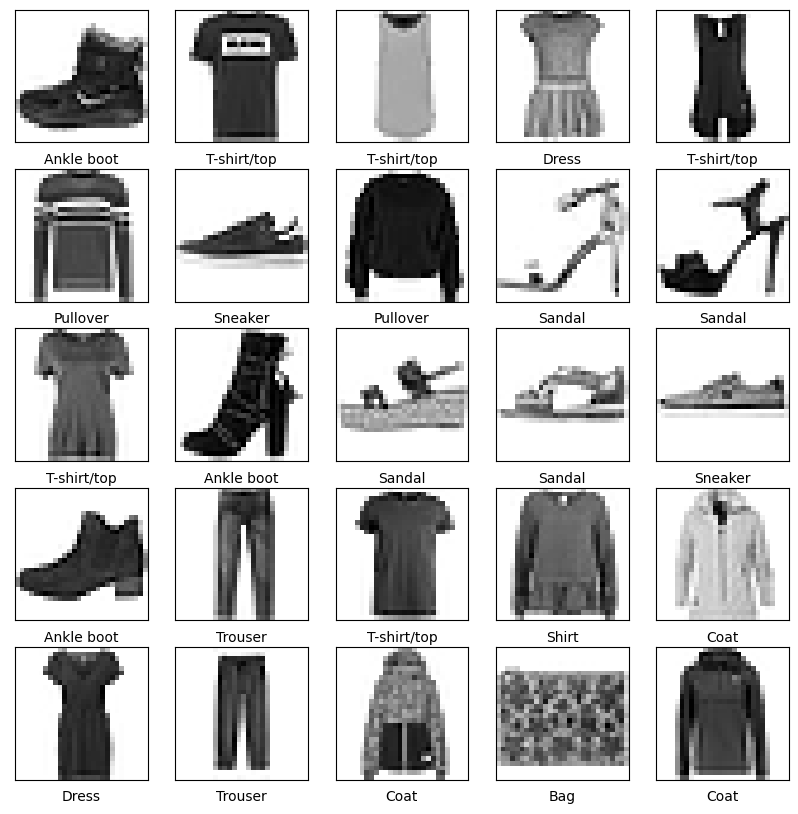

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 8ms/step - loss: 0.4943 - accuracy: 0.8280
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3738 - accuracy: 0.8663
Epoch 3/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3344 - accuracy: 0.8777
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3116 - accuracy: 0.8857
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2940 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2799 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2655 - accuracy: 0.9009
Epoch 8/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2565 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2476 - accuracy: 0.9070
Epoch 10/10
1875/1875 [==============================] - 14s 7ms/step - l

In [11]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.3264 - accuracy: 0.8862 - 2s/epoch - 7ms/step

Test accuracy: 0.8862000107765198

Test accuracy: 0.8862000107765198


In [12]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [13]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 4ms/step


In [14]:
print (predictions[0])
print (np.argmax(predictions[0]))
print (test_labels[0])

[1.3080951e-06 7.8469904e-12 3.3869936e-09 7.7928816e-11 7.5131074e-10
 4.3807490e-04 4.6319997e-08 1.4210112e-03 9.1195380e-09 9.9813950e-01]
9
9


In [21]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10), class_names, rotation=60)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

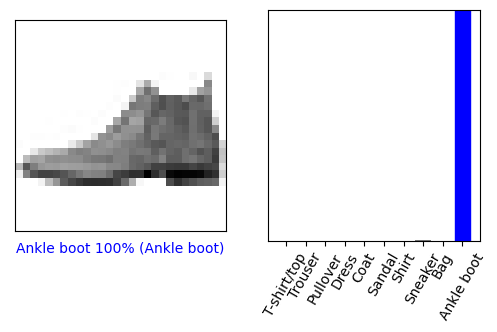

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

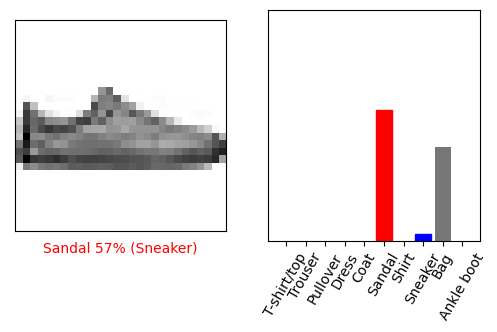

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

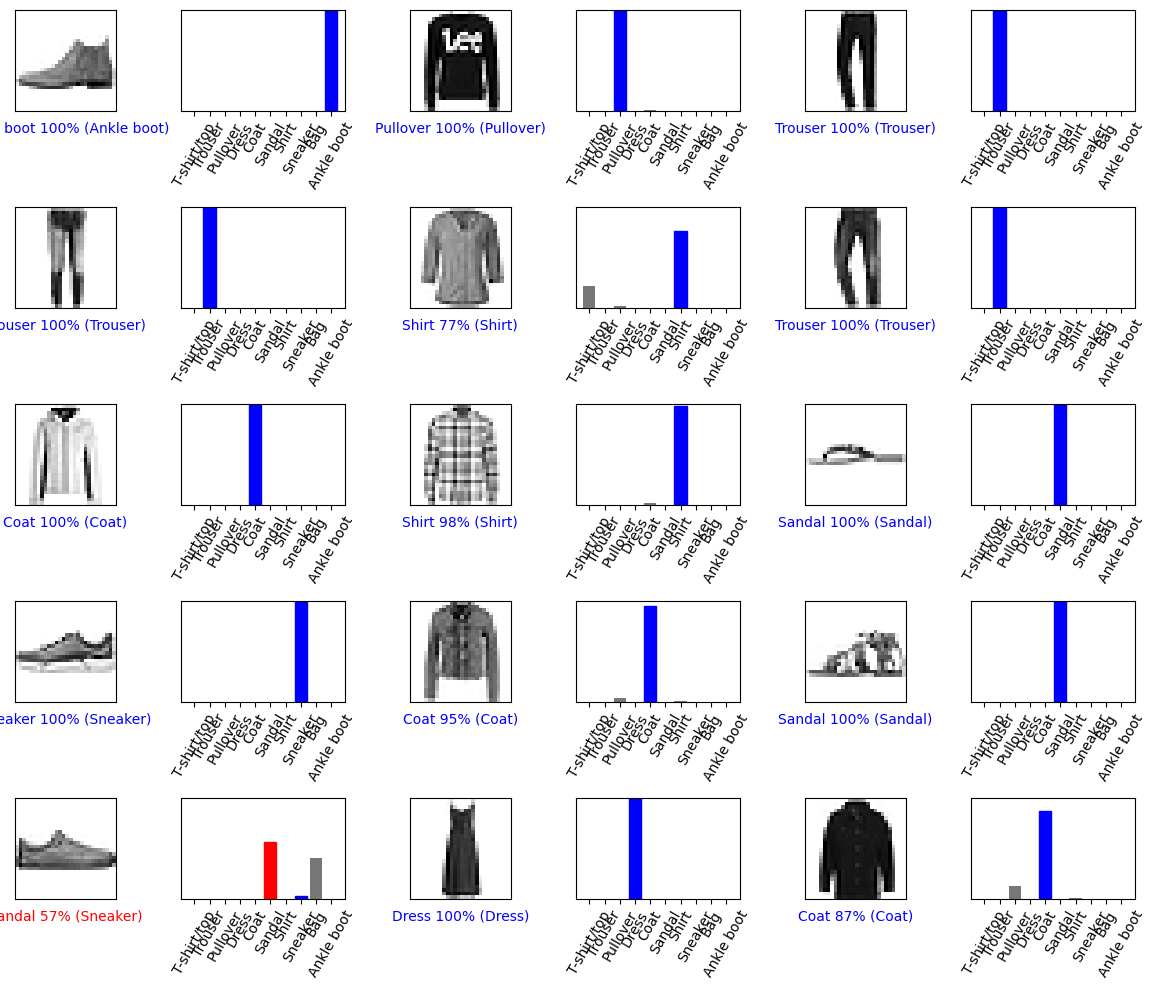

In [24]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 36ms/step
[[8.0977279e-06 8.3841334e-10 3.9371173e-07 5.1429161e-08 4.4410200e-08
  9.7592017e-03 9.3173480e-07 9.4062823e-01 1.1989393e-05 4.9591120e-02]]
7


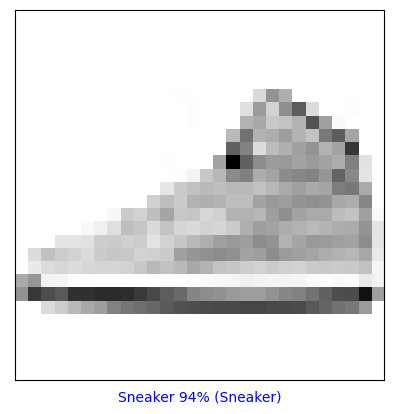

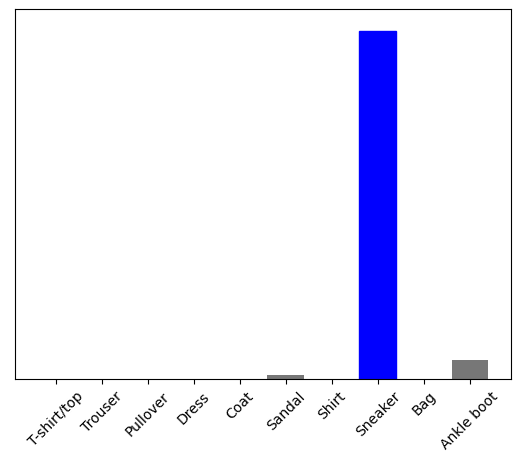

In [27]:
# Grab an image from the test dataset.
idx = 45
img = test_images[idx]

print(img.shape)

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = probability_model.predict(img)

print(predictions_single)
print (np.argmax(predictions_single[0]))

plot_image(idx, predictions_single[0], test_labels, test_images)
plt.show()

plot_value_array(idx, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()
